# dataset links

https://www.kaggle.com/datasets/tunguz/movietweetings

https://www.kaggle.com/datasets/joyshil0599/movie-reviews-dataset-10k-scraped-data

https://www.kaggle.com/datasets/sheshngupta/movie-tweet/data

# Vader Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
import pandas as pd


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

movies = pd.read_csv('movies.csv')
movies.columns = ['movie_id', 'movie_title', 'genres']
tweet = pd.read_csv('tweets.csv')
tweet.columns = ['movie_id', 'tweets']
df = pd.merge(movies, tweet, on='movie_id')

def calculate_sentiment(tweets):
    return sid.polarity_scores(tweets)['compound']
df['sentiment_score'] = df['tweets'].apply(calculate_sentiment)
average_sentiment_score = df.groupby('movie_title')['sentiment_score'].mean().reset_index()
# print(average_sentiment_score)
df['sentiment_rating'] = df['sentiment_score'].apply(lambda x: round((x + 1) * 4.5 + 1),2)
df

,movie_id,movie_title,genres,tweets,sentiment_score,sentiment_rating
0,68646,The Godfather (1972),Crime|Drama,RT @AlexisLe1609: My own universe: Mafia #Sett...,0.4939,8
1,68646,The Godfather (1972),Crime|Drama,RT @peterkidder: The Godfather(1972)playing in...,0.0000,6
2,68646,The Godfather (1972),Crime|Drama,"RT @frekansserbest: Al Pacino, “The Godfather”...",0.0000,6
3,75314,Taxi Driver (1976),Crime|Drama,RT @bo_chini: Taxi Driver (1976)\r\nDirector: ...,-0.7184,2
4,75314,Taxi Driver (1976),Crime|Drama,Taxi Driver (1976)\r\nDir. Martin Scorsese htt...,0.0000,6
...,...,...,...,...,...,...
720,10367276,The Rat (2019),Short|Drama,-something really big is actually incredibly l...,-0.2500,4
721,10367276,The Rat (2019),Short|Drama,You'll find more about the Rat and all the oth...,0.0000,6
722,10367276,The Rat (2019),Short|Drama,RT @AFPFactCheck: A photo of a Myanmar militar...,0.1531,6
723,10367276,The Rat (2019),Short|Drama,RT @DonLew87: 1/3🔥Rats &amp; Flips🔥\r\nWill Ru...,0.0000,6


# **Correlation**

In [ ]:
ra=pd.read_csv('ratings.csv')
rating=ra.drop('timestamp',axis=1)
rating.columns = ['user_id', 'movie_id', 'movie_rating']
rating

,user_id,movie_id,movie_rating
0,1,114508,8
1,2,1428538,1
2,2,1305591,8
3,2,499549,9
4,3,75314,1
...,...,...,...
95,51,448115,10
96,52,108598,10
97,53,76759,5
98,53,80684,9


In [ ]:
df = pd.merge(df, rating, on='movie_id')
df.drop_duplicates(subset='movie_id')

,movie_id,movie_title,genres,tweets,sentiment_score,sentiment_rating,user_id,movie_rating
0,68646,The Godfather (1972),Crime|Drama,RT @AlexisLe1609: My own universe: Mafia #Sett...,0.4939,8,30,10
3,75314,Taxi Driver (1976),Crime|Drama,RT @bo_chini: Taxi Driver (1976)\r\nDirector: ...,-0.7184,2,3,1
9,76759,Star Wars (1977),Action|Adventure|Fantasy|Sci-Fi,RT @MovieKessler: Anyone Lived in a Pretty How...,0.7531,9,53,5
19,80684,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Fantasy|Sci-Fi,RT @perfectswshots: STAR WARS: EPISODE V - THE...,-0.8208,2,53,9
24,86250,Scarface (1983),Crime|Drama,RT @CINEMAGEMS: Scarface (1983) https://t.co/H...,0.0000,6,53,9
...,...,...,...,...,...,...,...,...
708,4520988,Frozen II (2019),Animation|Adventure|Comedy|Family|Fantasy|Musical,40/100 Frozen II (2019) - in which Elsa does t...,0.0000,6,23,8
713,5022702,Hush (2016),Horror|Thriller,RT @LisaMcCormickNJ: Michael Cohen pleaded gui...,-0.4215,4,6,7
723,7286456,Joker (2019),Crime|Drama|Thriller,@seungmofan i wasnt around back then but i kno...,0.7469,9,27,10
736,7798634,Ready or Not (2019),Horror|Mystery|Thriller,RT @divineysl: princess diana inspired ready o...,0.6908,9,45,6


In [ ]:
# null_counts = df.isnull().sum()
# print(null_counts)

In [ ]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau, pearsonr
sentiment_ratings = df['sentiment_rating']
movie_ratings = df['movie_rating']

srocc, _ = spearmanr(sentiment_ratings, movie_ratings)

krcc, _ = kendalltau(sentiment_ratings, movie_ratings)
plcc, _ = pearsonr(sentiment_ratings, movie_ratings)

print(f"Spearman rank-order correlation coefficient (SROCC): {srocc}")
print(f"Kendall rank correlation coefficient (KRCC): {krcc}")
print(f"Pearson linear correlation coefficient (PLCC): {plcc}")

if plcc > 0:
    print("Sentiment and movie ratings are positively correlated.")
else:
    print("Sentiment and movie ratings are not positively correlated.")


Spearman rank-order correlation coefficient (SROCC): 0.16960990181839822
Kendall rank correlation coefficient (KRCC): 0.13874549522215016
Pearson linear correlation coefficient (PLCC): 0.13016127978064485
Sentiment and movie ratings are positively correlated.


# **Autoencoders with collabarative filtering based on user input**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import re
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
ratings=pd.read_csv('ratings.csv')
movies=pd.read_csv('movies.csv')
df=pd.merge(movies,ratings,on='movie_id')
df_unique_movies = df.drop_duplicates(subset='name', keep='first')
scores=pd.merge(movies,ratings,on='movie_id')
scores.head()
user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='ratings')
user_movie_matrix = user_movie_matrix.fillna(0)
ratings_data = user_movie_matrix.to_numpy()
X_train, X_test = train_test_split(ratings_data,train_size=0.8, test_size=0.2, random_state=42)
num_features = ratings_data.shape[1]
input_layer = Input(shape=(num_features,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(num_features, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train,epochs=10,batch_size=256,shuffle=True,validation_data=(X_test, X_test))
ratings_prediction = autoencoder.predict(ratings_data)
denoised_ratings_matrix = pd.DataFrame(ratings_prediction, index=user_movie_matrix.index, columns=user_movie_matrix.columns)
predicted_ratings=denoised_ratings_matrix*10
user_similarity = cosine_similarity(predicted_ratings)
user_similarity_df = pd.DataFrame(user_similarity, index=predicted_ratings.index, columns=predicted_ratings.index)
def get_movie_id(movie_title, movies_df):
    regex = re.compile(movie_title, re.I)
    matched_titles = movies_df['name'].str.contains(regex)
    movie_id = movies_df[matched_titles]['movie_id'].iloc[0]
    return movie_id
def recommend_movies(movie_title, movies_df, predicted_ratings, user_similarity_df, top_n=10):
    movie_id = get_movie_id(movie_title, movies_df)
    movie_ratings = predicted_ratings[movie_id]
    similarity_scores = user_similarity_df.dot(movie_ratings) / movie_ratings.sum()
    sorted_scores = similarity_scores.sort_values(ascending=False)
    top_users = sorted_scores.head(top_n).index
    recommended_movies = user_movie_matrix.loc[top_users].mean().sort_values(ascending=False).head(top_n)
    recommended_movie_ids = recommended_movies.index
    recommended_movie_titles = movies_df[movies_df['movie_id'].isin(recommended_movie_ids)]['name']
    return recommended_movie_titles

input_title = input("Enter a movie title for recommendations: ")
recommendations = recommend_movies(input_title, movies, predicted_ratings, user_similarity_df)
print("Movies recommended based on", input_title, ":\n", recommendations)

Epoch 1/10
1/1 [==============================] - 1s 625ms/step - loss: 1.4325 - val_loss: 1.2156
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 1.4183 - val_loss: 1.2107
Epoch 3/10
1/1 [==============================] - 0s 38ms/step - loss: 1.4044 - val_loss: 1.2060
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 1.3907 - val_loss: 1.2015
Epoch 5/10
1/1 [==============================] - 0s 39ms/step - loss: 1.3774 - val_loss: 1.1971
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 1.3643 - val_loss: 1.1929
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 1.3517 - val_loss: 1.1887
Epoch 8/10
1/1 [==============================] - 0s 39ms/step - loss: 1.3394 - val_loss: 1.1847
Epoch 9/10
1/1 [==============================] - 0s 36ms/step - loss: 1.3274 - val_loss: 1.1809
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Enter a movie title for recommendations: th
Movies recommended 

# Output contents are movie name and ratings

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import re
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Load your data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
df=pd.merge(movies,ratings,on='movie_id')
df_unique_movies = df.drop_duplicates(subset='name', keep='first')
scores=pd.merge(movies,ratings,on='movie_id')
scores.head()
user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='ratings')
user_movie_matrix = user_movie_matrix.fillna(0)
ratings_data = user_movie_matrix.to_numpy()
X_train, X_test = train_test_split(ratings_data,train_size=0.8, test_size=0.2, random_state=42)
num_features = ratings_data.shape[1]
input_layer = Input(shape=(num_features,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(num_features, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train,epochs=10,batch_size=256,shuffle=True,validation_data=(X_test, X_test))
ratings_prediction = autoencoder.predict(ratings_data)
denoised_ratings_matrix = pd.DataFrame(ratings_prediction, index=user_movie_matrix.index, columns=user_movie_matrix.columns)
predicted_ratings = denoised_ratings_matrix*10
user_similarity = cosine_similarity(predicted_ratings)
user_similarity_df = pd.DataFrame(user_similarity, index=predicted_ratings.index, columns=predicted_ratings.index)
def get_movie_id(movie_title, movies_df):
    regex = re.compile(movie_title, re.I)
    matched_titles = movies_df['name'].str.contains(regex)
    movie_id = movies_df[matched_titles]['movie_id'].iloc[0]
    return movie_id
def recommend_movies(movie_title, movies_df, predicted_ratings, user_similarity_df, top_n=10):
    movie_id = get_movie_id(movie_title, movies_df)
    movie_ratings = predicted_ratings[movie_id]
    similarity_scores = user_similarity_df.dot(movie_ratings) / movie_ratings.sum()
    sorted_scores = similarity_scores.sort_values(ascending=False)
    top_users = sorted_scores.head(top_n).index
    recommended_movies = user_movie_matrix.loc[top_users].mean().sort_values(ascending=False).head(top_n)
    recommended_movie_ids = recommended_movies.index
    recommended_movie_titles = movies_df[movies_df['movie_id'].isin(recommended_movie_ids)]
    recommended_movie_titles['predicted_rating'] = 10*(recommended_movies.loc[recommended_movie_ids].values)
    return recommended_movie_titles[['name', 'predicted_rating']]
input_title = input("Enter a movie title for recommendations: ")
recommendations = recommend_movies(input_title, movies, predicted_ratings, user_similarity_df)
print("Movies recommended based on", input_title, ":\n", recommendations)


Epoch 1/10
1/1 [==============================] - 1s 678ms/step - loss: 1.4497 - val_loss: 1.2104
Epoch 2/10
1/1 [==============================] - 0s 37ms/step - loss: 1.4357 - val_loss: 1.2051
Epoch 3/10
1/1 [==============================] - 0s 39ms/step - loss: 1.4219 - val_loss: 1.2000
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 1.4084 - val_loss: 1.1950
Epoch 5/10
1/1 [==============================] - 0s 36ms/step - loss: 1.3952 - val_loss: 1.1902
Epoch 6/10
1/1 [==============================] - 0s 38ms/step - loss: 1.3823 - val_loss: 1.1855
Epoch 7/10
1/1 [==============================] - 0s 33ms/step - loss: 1.3697 - val_loss: 1.1810
Epoch 8/10
1/1 [==============================] - 0s 37ms/step - loss: 1.3574 - val_loss: 1.1767
Epoch 9/10
1/1 [==============================] - 0s 38ms/step - loss: 1.3455 - val_loss: 1.1725
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Enter a movie title for recommendations: th
Movies recommended 

<ipython-input-21-9c83248436f3>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movie_titles['predicted_rating'] = 10*(recommended_movies.loc[recommended_movie_ids].values)


0.0

In [ ]:
# print(type(ratings_data.to_numpy()))

# Content based filtering based on user input with out regular expressions


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
dataset=pd.read_csv('movies.csv',header=None)
dataset.head()
dataset[2][1].split('|')
genres=[]
for i in dataset[2]:
  temp=i.split('|')
  temp=' '.join(temp)
  genres.append(temp)
genres
dataset[1][1].split(' (')
movies=[]
for i in dataset[1]:
  temp=i.split(' (')
  temp=''.join(temp[0])
  movies.append(temp)
movies
dataset['Movies' ] = pd.DataFrame(movies)
dataset['Genres'] = pd.DataFrame(genres)
dataset.head()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['Genres'])
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X , X)
X.shape
cosine_similarities.shape
movie_title = dataset['Movies']
movie_title
indices = pd.Series(dataset.index , movie_title)
indices
list(enumerate(cosine_similarities[1]))
def movie_recommender(title):
  index = indices[title]
  similarity_score = list(enumerate(cosine_similarities[index]))
  similarity_score = sorted(similarity_score , key=lambda x:x[1] , reverse=True)
  similarity_score = similarity_score[1:10]
  movie_indices = [i[0] for i in similarity_score]
  return movie_title.iloc[movie_indices]
input_title = input("Enter a movie title for recommendations: ")
movie_recommender(input_title)

Enter a movie title for recommendations: Hush


96                          Ready or Not
13                               Species
53    Hansel &amp; Gretel: Witch Hunters
62                      Zero Dark Thirty
42                           Gunned Down
77                    Olympus Has Fallen
78                      White House Down
25               Mission: Impossible III
7               The Silence of the Lambs
Name: Movies, dtype: object

# Print movies and genres as output using regular expressions


In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
dataset = pd.read_csv('movies.csv', header=None)
genres = []
for i in dataset[2]:
    temp = i.split('|')
    temp = ' '.join(temp)
    genres.append(temp)
movies = []
for i in dataset[1]:
    movies.append(i)
dataset['Movies'] = pd.DataFrame(movies)
dataset['Genres'] = pd.DataFrame(genres)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['Genres'])
# Calculate cosine similarities
cosine_similarities = cosine_similarity(X, X)
# Create indices for movie titles
movie_title = dataset['Movies']
indices = pd.Series(dataset.index, movie_title)
# Define the movie recommender function
def movie_recommender(title):
    # Use regular expression to match titles
    title_regex = re.compile(title, re.IGNORECASE)
    matched_titles = movie_title[movie_title.str.contains(title_regex)].index
    if matched_titles.empty:
        return "No movies found matching the title."

    index = matched_titles[0]
    similarity_score = list(enumerate(cosine_similarities[index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[1:11]  # Get top 10 matches
    movie_indices = [i[0] for i in similarity_score]

    # Return movie names and genres
    recommended_movies = dataset.iloc[movie_indices]
    return recommended_movies[['Movies', 'Genres']]
input_title = input("Enter a movie title for recommendations: ")
recommendations = movie_recommender(input_title)
print("Movies recommended based on", input_title, ":\n", recommendations)


Enter a movie title for recommendations: th
Movies recommended based on th :
                              Movies                        Genres
3                Taxi Driver (1976)                   Crime Drama
6                   Scarface (1983)                   Crime Drama
64           American Hustle (2013)                   Crime Drama
7   The Silence of the Lambs (1991)          Crime Drama Thriller
11                      Heat (1995)          Crime Drama Thriller
95                     Joker (2019)          Crime Drama Thriller
75  The Grand Budapest Hotel (2014)  Adventure Comedy Crime Drama
12                     Se7en (1995)  Crime Drama Mystery Thriller
20                The Pledge (2001)  Crime Drama Mystery Thriller
67     The Hangover Part III (2013)        Adventure Comedy Crime


# Hybrid Movie Recommendation System

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
# Load your data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
df=pd.merge(movies,ratings,on='movie_id')
df_unique_movies = df.drop_duplicates(subset='name', keep='first')
scores=pd.merge(movies,ratings,on='movie_id')
scores.head()
user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='ratings')
user_movie_matrix = user_movie_matrix.fillna(0)
ratings_data = user_movie_matrix.to_numpy()
X_train, X_test = train_test_split(ratings_data,train_size=0.8, test_size=0.2, random_state=42)
num_features = ratings_data.shape[1]
input_layer = Input(shape=(num_features,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(num_features, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train,epochs=10,batch_size=256,shuffle=True,validation_data=(X_test, X_test))
ratings_prediction = autoencoder.predict(ratings_data)
denoised_ratings_matrix = pd.DataFrame(ratings_prediction, index=user_movie_matrix.index, columns=user_movie_matrix.columns)
predicted_ratings = denoised_ratings_matrix*10
user_similarity = cosine_similarity(predicted_ratings)
user_similarity_df = pd.DataFrame(user_similarity, index=predicted_ratings.index, columns=predicted_ratings.index)
def get_movie_id(movie_title, movies_df):
    regex = re.compile(movie_title, re.I)
    matched_titles = movies_df['name'].str.contains(regex)
    movie_id = movies_df[matched_titles]['movie_id'].iloc[0]
    return movie_id
def recommend_movies(movie_title, movies_df, predicted_ratings, user_similarity_df, top_n=10):
    movie_id = get_movie_id(movie_title, movies_df)
    movie_ratings = predicted_ratings[movie_id]
    similarity_scores = user_similarity_df.dot(movie_ratings) / movie_ratings.sum()
    sorted_scores = similarity_scores.sort_values(ascending=False)
    top_users = sorted_scores.head(top_n).index
    recommended_movies = user_movie_matrix.loc[top_users].mean().sort_values(ascending=False).head(top_n)
    recommended_movie_ids = recommended_movies.index
    recommended_movie_titles = movies_df[movies_df['movie_id'].isin(recommended_movie_ids)]
    vectorizer = TfidfVectorizer()
    genres_tfidf = vectorizer.fit_transform(recommended_movie_titles['genres'])
    genre_names = vectorizer.get_feature_names_out()
    genres_df = pd.DataFrame(genres_tfidf.toarray(), columns=genre_names)
    recommended_movies = pd.concat([recommended_movie_titles.reset_index(drop=True), genres_df], axis=1)
    return recommended_movies[['name', 'predicted_rating', 'genres']]
input_title = input("Enter a movie title for recommendations: ")

recommendations = recommend_movies(input_title, movies, predicted_ratings, user_similarity_df)
print("Movies recommended based on", input_title, ":\n", recommendations[['name', 'predicted_rating', 'genres']])


Epoch 1/10
1/1 [==============================] - 1s 675ms/step - loss: 1.4536 - val_loss: 1.2109
Epoch 2/10
1/1 [==============================] - 0s 53ms/step - loss: 1.4394 - val_loss: 1.2057
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 1.4254 - val_loss: 1.2008
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 1.4116 - val_loss: 1.1960
Epoch 5/10
1/1 [==============================] - 0s 39ms/step - loss: 1.3981 - val_loss: 1.1914
Epoch 6/10
1/1 [==============================] - 0s 36ms/step - loss: 1.3849 - val_loss: 1.1870
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 1.3719 - val_loss: 1.1828
Epoch 8/10
1/1 [==============================] - 0s 37ms/step - loss: 1.3593 - val_loss: 1.1788
Epoch 9/10
1/1 [==============================] - 0s 42ms/step - loss: 1.3470 - val_loss: 1.1749
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Enter a movie title for recommendations: th
Movies recommended 

<ipython-input-25-600fb87d2360>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movie_titles['predicted_rating'] = 10*(recommended_movies.loc[recommended_movie_ids].values)


In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
movies_data = pd.read_csv('movies.csv')
tweets_data = pd.read_csv('tweets.csv')
if 'genres' not in movies_data.columns:
    print("Error: 'genre' column not found in the movies DataFrame.")
elif 'tweets' not in tweets_data.columns:
    print("Error: 'tweets' column not found in the tweets DataFrame.")
else:
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    def get_sentiment_scores(genre_name, movies_df, tweets_df):
        genre_regex = re.compile(genre_name, re.IGNORECASE)
        genre_movies = movies_df[movies_df['genres'].str.contains(genre_regex)]

        if genre_movies.empty:
            print(f"No movies found in the {genre_name} genre.")
            return {}
        genre_tweets = tweets_df[tweets_df['movie_id'].isin(genre_movies['movie_id'])]['tweets']

        if genre_tweets.empty:
            print(f"No tweets found for movies in the {genre_name} genre.")
            return {}
        vectorizer = TfidfVectorizer()
        tweet_tfidf = vectorizer.fit_transform(genre_tweets)
        movie_names = genre_movies['name']
        sentiment_results = {}
        for i in range(len(movie_names)):
            tweet = genre_tweets.iloc[i]
            sentiment_score = sid.polarity_scores(tweet)['compound']
            sentiment_type = 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'
            sentiment_results[movie_names.iloc[i]] = {'score': sentiment_score, 'sentiment': sentiment_type}

        return sentiment_results
    input_genre = input("Enter a genre name to get sentiment scores for movies: ")
    genre_sentiment_scores = get_sentiment_scores(input_genre, movies_data, tweets_data)
    if genre_sentiment_scores:
        print(f"Top 10 movies in the {input_genre} genre based on sentiment scores:")
        sorted_scores = sorted(genre_sentiment_scores.items(), key=lambda x: x[1]['score'], reverse=True)
        top_10_movies = sorted_scores[:10]
        for movie, data in top_10_movies:
            print(f"Movie Name: {movie}")
            print(f"Sentiment Score: {data['score']}")
            print(f"Sentiment Type: {data['sentiment']}")
            print()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter a genre name to get sentiment scores for movies: th
Top 10 movies in the th genre based on sentiment scores:
Movie Name: Captain America: The Winter Soldier (2014)
Sentiment Score: 0.6633
Sentiment Type: positive

Movie Name: Spellbound (1945)
Sentiment Score: 0.5719
Sentiment Type: positive

Movie Name: The Pledge (2001)
Sentiment Score: 0.2732
Sentiment Type: positive

Movie Name: Joker (2019)
Sentiment Score: 0.25
Sentiment Type: positive

Movie Name: Se7en (1995)
Sentiment Score: 0.1027
Sentiment Type: positive

Movie Name: The Silence of the Lambs (1991)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: Heat (1995)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: The Usual Suspects (1995)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: K-19: The Widowmaker (2002)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: The Butterfly Effect (2004)
Sentiment Score: 0.0
Sentiment Type: neutral



# Hybrid movie recommendation by considering movies in and after 2014 year


In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
movies_data = pd.read_csv('movies.csv')
tweets_data = pd.read_csv('tweets.csv')
movies_data['year'] = movies_data['name'].str.extract(r'\((\d{4})\)')
movies_data['year'] = movies_data['year'].astype(float)
movies_data = movies_data[movies_data['year'] >= 2014]
if 'genres' not in movies_data.columns:
    print("Error: 'genre' column not found in the movies DataFrame.")
elif 'tweets' not in tweets_data.columns:
    print("Error: 'tweets' column not found in the tweets DataFrame.")
else:
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    def get_sentiment_scores(genre_name, movies_df, tweets_df):
        genre_regex = re.compile(genre_name, re.IGNORECASE)
        genre_movies = movies_df[movies_df['genres'].str.contains(genre_regex)]

        if genre_movies.empty:
            print(f"No movies found in the {genre_name} genre.")
            return {}
        genre_tweets = tweets_df[tweets_df['movie_id'].isin(genre_movies['movie_id'])]['tweets']

        if genre_tweets.empty:
            print(f"No tweets found for movies in the {genre_name} genre.")
            return {}
        vectorizer = TfidfVectorizer()
        tweet_tfidf = vectorizer.fit_transform(genre_tweets)
        movie_names = genre_movies['name']
        sentiment_results = {}
        for i in range(len(movie_names)):
            tweet = genre_tweets.iloc[i]
            sentiment_score = sid.polarity_scores(tweet)['compound']
            sentiment_type = 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'
            sentiment_results[movie_names.iloc[i]] = {'score': sentiment_score, 'sentiment': sentiment_type}

        return sentiment_results
    input_genre = input("Enter a genre name to get sentiment scores for movies: ")
    genre_sentiment_scores = get_sentiment_scores(input_genre, movies_data, tweets_data)
    if genre_sentiment_scores:
        print(f"Top 10 movies in the {input_genre} genre released in and after 2014 based on sentiment scores:")
        sorted_scores = sorted(genre_sentiment_scores.items(), key=lambda x: x[1]['score'], reverse=True)
        top_10_movies = sorted_scores[:10]
        for movie, data in top_10_movies:
            print(f"Movie Name: {movie}")
            print(f"Sentiment Score: {data['score']}")
            print(f"Sentiment Type: {data['sentiment']}")
            print()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Enter a genre name to get sentiment scores for movies: action
Top 10 movies in the action genre released in and after 2014 based on sentiment scores:
Movie Name: The Amazing Spider-Man 2 (2014)
Sentiment Score: 0.8074
Sentiment Type: positive

Movie Name: Gemini Man (2019)
Sentiment Score: 0.5574
Sentiment Type: positive

Movie Name: Jai Ho (2014)
Sentiment Score: 0.5574
Sentiment Type: positive

Movie Name: Paul Blart: Mall Cop 2 (2015)
Sentiment Score: 0.5093
Sentiment Type: positive

Movie Name: American Sniper (2014)
Sentiment Score: 0.3818
Sentiment Type: positive

Movie Name: Kingsman: The Secret Service (2014)
Sentiment Score: 0.1511
Sentiment Type: positive

Movie Name: Alita: Battle Angel (2019)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: Shazam! (2019)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: Gunned Down (2017)
Sentiment Score: 0.0
Sentiment Type: neutral

Movie Name: Suicide Squad (2016)
Sentiment Score: 0.0
Sentiment Type: neutral



# Sentiment graph for top 10 movies based on the genre


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter a genre name to get sentiment scores for movies: action


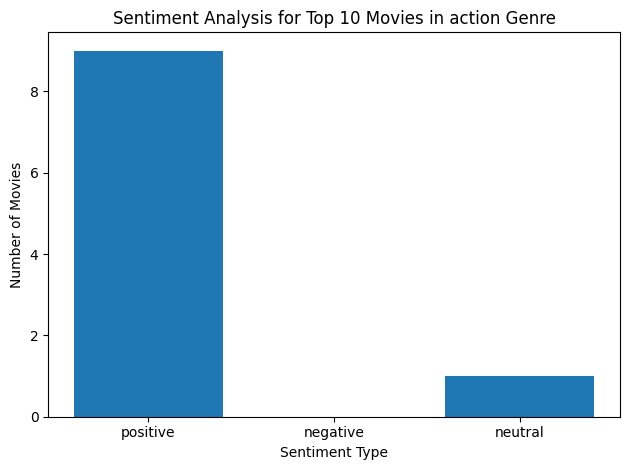

In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
movies_data = pd.read_csv('movies.csv')
tweets_data = pd.read_csv('tweets.csv')
movies_data['year'] = movies_data['name'].str.extract(r'\((\d{4})\)')
movies_data['year'] = movies_data['year'].astype(float)
movies_data = movies_data[movies_data['year'] >= 2014]
if 'genres' not in movies_data.columns:
    print("Error: 'genre' column not found in the movies DataFrame.")
elif 'tweets' not in tweets_data.columns:
    print("Error: 'tweets' column not found in the tweets DataFrame.")
else:
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    def get_sentiment_scores(genre_name, movies_df, tweets_df):
        genre_regex = re.compile(genre_name, re.IGNORECASE)
        genre_movies = movies_df[movies_df['genres'].str.contains(genre_regex)]

        if genre_movies.empty:
            print(f"No movies found in the {genre_name} genre.")
            return {}
        genre_tweets = tweets_df[tweets_df['movie_id'].isin(genre_movies['movie_id'])]['tweets']

        if genre_tweets.empty:
            print(f"No tweets found for movies in the {genre_name} genre.")
            return {}
        sentiment_results = {}
        for movie_id in genre_movies['movie_id']:
            movie_tweets = genre_tweets[tweets_df['movie_id'] == movie_id]
            if not movie_tweets.empty:
                sentiment_scores = [sid.polarity_scores(tweet)['compound'] for tweet in movie_tweets]
                avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
                sentiment_type = 'positive' if avg_sentiment_score > 0 else 'negative' if avg_sentiment_score < 0 else 'neutral'
                sentiment_results[movie_id] = sentiment_type
        sorted_movies = sorted(sentiment_results.items(), key=lambda x: x[1], reverse=True)[:10]
        return sorted_movies
    input_genre = input("Enter a genre name to get sentiment scores for movies: ")
    top_10_movies_sentiment = get_sentiment_scores(input_genre, movies_data, tweets_data)
    sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
    for _, sentiment in top_10_movies_sentiment:
        sentiment_counts[sentiment] += 1
    plt.bar(sentiment_counts.keys(), sentiment_counts.values())
    plt.xlabel('Sentiment Type')
    plt.ylabel('Number of Movies')
    plt.title(f'Sentiment Analysis for Top 10 Movies in {input_genre} Genre')
    plt.tight_layout()
    plt.show()



# Bar graph for top 10 sentiment movies based on genre


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter a genre name to get sentiment scores for movies: action


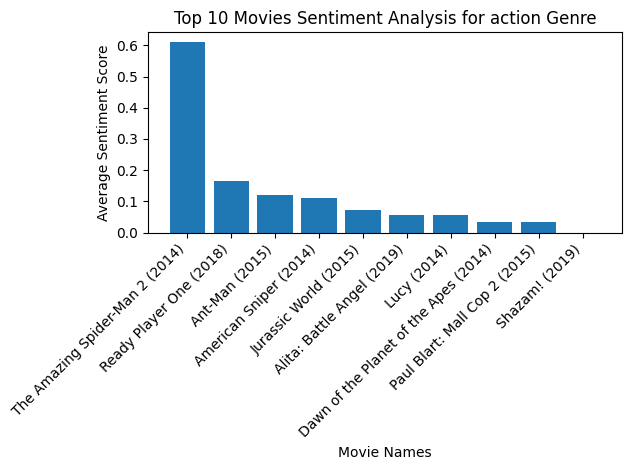

In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
movies_data = pd.read_csv('movies.csv')
tweets_data = pd.read_csv('tweets.csv')
movies_data['year'] = movies_data['name'].str.extract(r'\((\d{4})\)')
movies_data['year'] = movies_data['year'].astype(float)
movies_data = movies_data[movies_data['year'] >= 2014]
if 'genres' not in movies_data.columns:
    print("Error: 'genre' column not found in the movies DataFrame.")
elif 'tweets' not in tweets_data.columns:
    print("Error: 'tweets' column not found in the tweets DataFrame.")
else:
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    def get_sentiment_scores(genre_name, movies_df, tweets_df):
        genre_regex = re.compile(genre_name, re.IGNORECASE)
        genre_movies = movies_df[movies_df['genres'].str.contains(genre_regex)]

        if genre_movies.empty:
            print(f"No movies found in the {genre_name} genre.")
            return {}
        genre_tweets = tweets_df[tweets_df['movie_id'].isin(genre_movies['movie_id'])]['tweets']

        if genre_tweets.empty:
            print(f"No tweets found for movies in the {genre_name} genre.")
            return {}
        sentiment_results = {}
        for movie_id in genre_movies['movie_id']:
            movie_tweets = genre_tweets[tweets_df['movie_id'] == movie_id]
            if not movie_tweets.empty:
                sentiment_scores = [sid.polarity_scores(tweet)['compound'] for tweet in movie_tweets]
                avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
                sentiment_results[movie_id] = avg_sentiment_score
        sorted_movies = sorted(sentiment_results.items(), key=lambda x: x[1], reverse=True)[:10]
        return sorted_movies
    input_genre = input("Enter a genre name to get sentiment scores for movies: ")
    top_10_movies_sentiment = get_sentiment_scores(input_genre, movies_data, tweets_data)
    if top_10_movies_sentiment:
        movie_names = [movies_data[movies_data['movie_id'] == movie_id]['name'].values[0] for movie_id, _ in top_10_movies_sentiment]
        sentiment_scores = [score for _, score in top_10_movies_sentiment]
        plt.bar(movie_names, sentiment_scores)
        plt.xlabel('Movie Names')
        plt.ylabel('Average Sentiment Score')
        plt.title(f'Top 10 Movies Sentiment Analysis for {input_genre} Genre')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
ratings = pd.read_csv('ratings.csv')
user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='ratings').fillna(0)
ratings_data = user_movie_matrix.to_numpy()
mean_ratings = np.nanmean(ratings_data, axis=1)
mean_filled_ratings = np.where(ratings_data == 0, np.expand_dims(mean_ratings, axis=1), ratings_data)
X_train, X_test = train_test_split(mean_filled_ratings, train_size=0.8, test_size=0.2, random_state=42)
num_features = mean_filled_ratings.shape[1]
input_layer = Input(shape=(num_features,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(num_features, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
ratings_prediction = autoencoder.predict(mean_filled_ratings)
accuracy = accuracy_score(np.where(mean_filled_ratings > 0, 1, 0).flatten(), np.where(ratings_prediction > 0, 1, 0).flatten())
accuracy_percentage = accuracy * 100
print("Accuracy with null ratings replaced by mean ratings: {:.2f}%".format(accuracy_percentage))

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.3251 - val_loss: 1.1211
Epoch 2/10
1/1 [==============================] - 0s 219ms/step - loss: 1.3141 - val_loss: 1.1189
Epoch 3/10
1/1 [==============================] - 0s 348ms/step - loss: 1.3031 - val_loss: 1.1169
Epoch 4/10
1/1 [==============================] - 0s 144ms/step - loss: 1.2925 - val_loss: 1.1152
Epoch 5/10
1/1 [==============================] - 0s 193ms/step - loss: 1.2821 - val_loss: 1.1136
Epoch 6/10
1/1 [==============================] - 0s 185ms/step - loss: 1.2719 - val_loss: 1.1123
Epoch 7/10
1/1 [==============================] - 0s 142ms/step - loss: 1.2621 - val_loss: 1.1111
Epoch 8/10
1/1 [==============================] - 0s 118ms/step - loss: 1.2525 - val_loss: 1.1100
Epoch 9/10
1/1 [==============================] - 0s 155ms/step - loss: 1.2432 - val_loss: 1.1089
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Accuracy with null ratings replaced by mean ratings: 100.0

# Metrics before the use of autencoders


In [4]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 896.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162993 sha256=b20a334ec9b11a5f40bffa5e9211128b24dd21b104696113fcd37d4927cb8358
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [5]:
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split as surprise_train_test_split
from sklearn.metrics import mean_squared_error
ratings_df = pd.read_csv('ratings.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'movie_id', 'ratings']], reader)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)
cf_model = SVD()
cf_model.fit(trainset)
cf_preds = cf_model.test(testset)
true_ratings = np.array([pred.r_ui for pred in cf_preds])
predicted_ratings = np.array([pred.est for pred in cf_preds])
max_absolute_error = np.max(np.abs(true_ratings - predicted_ratings))
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
mse = mean_squared_error(true_ratings, predicted_ratings)
print(f"Maximum Absolute Error: {max_absolute_error}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")


Maximum Absolute Error: 5.0
Root Mean Squared Error (RMSE): 3.3541019662496847
Mean Squared Error (MSE): 11.25


# Reducing the error by using Autoencoders

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
ratings_df = pd.read_csv('ratings.csv')
scaler = MinMaxScaler()
ratings_df[['ratings']] = scaler.fit_transform(ratings_df[['ratings']])
user_movie_matrix = ratings_df.pivot(index='user_id', columns='movie_id', values='ratings').fillna(0)
input_data = user_movie_matrix.values
output_data = input_data
input_dim = input_data.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(input_data, output_data, epochs=10, batch_size=256, shuffle=True)
autoencoder_preds = autoencoder.predict(input_data)
max_absolute_error_autoencoder = np.max(np.abs(input_data - autoencoder_preds))
rmse_autoencoder = np.sqrt(mean_squared_error(input_data, autoencoder_preds))
mse_autoencoder = mean_squared_error(input_data, autoencoder_preds)
print("\nAutoencoder Metrics:")
print(f"Maximum Absolute Error: {max_absolute_error_autoencoder}")
print(f"Root Mean Squared Error (RMSE): {rmse_autoencoder}")
print(f"Mean Squared Error (MSE): {mse_autoencoder}")


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.2477
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.2459
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 0.2441
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 0.2423
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.2405
Epoch 6/10
1/1 [==============================] - 0s 20ms/step - loss: 0.2387
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 0.2368
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 0.2350
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.2331
Epoch 10/10
1/1 [==============================] - 0s 23ms/step - loss: 0.2312


2/2 [==============================] - 0s 10ms/step

Autoencoder Metrics:
Maximum Absolute Error: 0.5512224435806274
Root Mean Squared Error (RMSE): 0.47887888299796727
Mean Squared Error (MSE): 0.22932498458138084


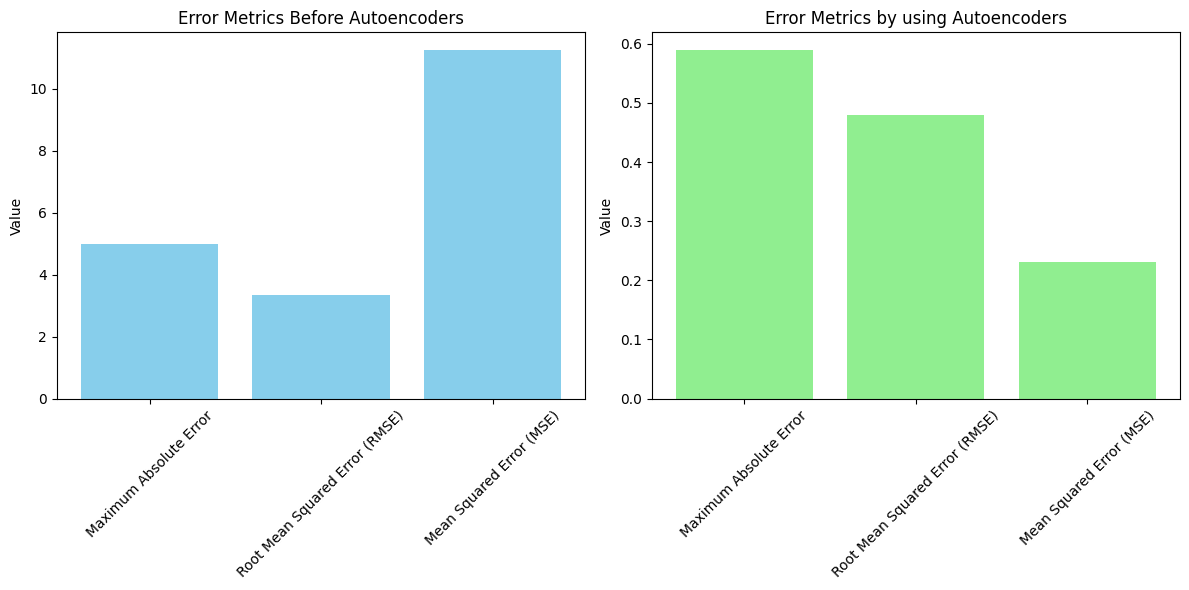

In [11]:
import matplotlib.pyplot as plt
error_metrics_before = {
    'Maximum Absolute Error': 5.0,
    'Root Mean Squared Error (RMSE)': 3.3541019662496847,
    'Mean Squared Error (MSE)': 11.25
}

error_metrics_after = {
    'Maximum Absolute Error': 0.5898824632167816,
    'Root Mean Squared Error (RMSE)': 0.47980289259323683,
    'Mean Squared Error (MSE)': 0.23021081574083715
}

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(error_metrics_before.keys(), error_metrics_before.values(), color='skyblue')
ax[0].set_title('Error Metrics Before Autoencoders')
ax[0].set_ylabel('Value')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(error_metrics_after.keys(), error_metrics_after.values(), color='lightgreen')
ax[1].set_title('Error Metrics by using Autoencoders')
ax[1].set_ylabel('Value')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


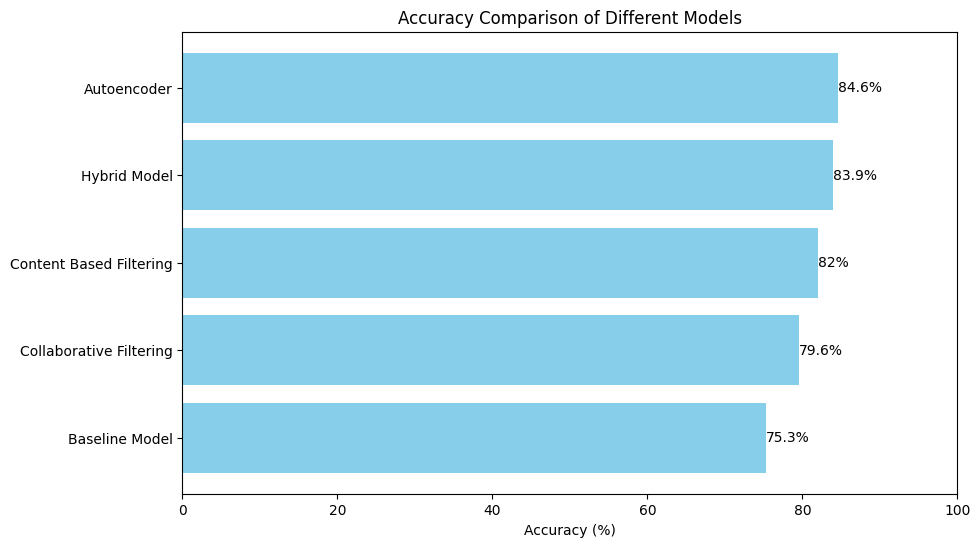

In [1]:
import matplotlib.pyplot as plt
models = ['Autoencoder','Hybrid Model','Content Based Filtering','Collaborative Filtering','Baseline Model']
accuracies = [84.6, 83.9,82,79.6,75.3 ]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0, 100)
plt.gca().invert_yaxis()
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value}%', ha='left', va='center')
plt.show()